In [35]:
import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/Mumbai_House_Rent.csv"
df = pd.read_csv(path)
df.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,Missing,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,1,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,4,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,Missing,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,3,1.0,800 sq.ft


In [36]:
df.Locality.unique()

array(['Andheri', 'Bandra', 'Bhandup', 'Byculla', 'Chembur', 'Colaba',
       'Dadar', 'Dharavi', 'Fort', 'Ghatkopar', 'Girgaon', 'Goregaon',
       'Govandi', 'Grant Road', 'Jogeshwari', 'Juhu', 'Khar', 'Kurla',
       'Lalbaug', 'Lokhandwala', 'Mahalakshmi', 'Mahim', 'Malabar Hill',
       'Malad', 'Marine Drive', 'Masjid', 'Matunga', 'Mulund',
       'Nariman Point', 'Parel', 'Powai', 'Prabhadevi', 'Santacruz',
       'Sion', 'Tardeo', 'Vidyavihar', 'Vikhroli', 'Vile Parle', 'Wadala',
       'Worli'], dtype=object)

In [37]:
df.shape

(15386, 9)

In [38]:
df.isnull().sum()

Locality                 0
Type                     0
Rent/Month               0
Build_up_area(sq.ft)     0
Furnishing               0
Bathrooms                0
Balcony                  0
Parking                 35
Carpet_area(sq.ft)       0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.Balcony.unique()

array(['Missing', '1', '4', '3', '2', '5', '6'], dtype=object)

In [41]:
df[df.Balcony=='Missing'].Balcony.count()

9262

In [42]:
balcony = df[~(df.Balcony=='Missing')].Balcony

In [43]:
balcony = balcony.apply(lambda x: int(x))

(array([3429.,    0., 1695.,    0.,  772.,    0.,  164.,    0.,   24.,
           5.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

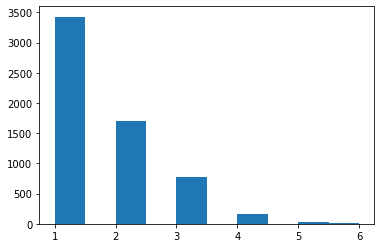

In [44]:
import matplotlib.pyplot as plt
plt.hist(balcony)

In [45]:
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].apply(lambda x: int(x.split()[0]))
df['Build_up_area(sq.ft)'].dtype

dtype('int64')

In [46]:
df_temp = df[~(df.Balcony=='Missing')]
df_temp.Balcony = balcony

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
df_temp.groupby('Balcony')['Build_up_area(sq.ft)'].describe()

,count,mean,std,min,25%,50%,75%,max
Balcony,,,,,,,,
1,3429.0,954.628463,420.112459,150.0,625.0,925.0,1200.0,3300.0
2,1695.0,1086.241888,451.855743,150.0,800.0,1000.0,1250.0,3923.0
3,772.0,1248.002591,461.068921,265.0,950.0,1200.0,1500.0,3500.0
4,164.0,1581.756098,706.270340,500.0,1200.0,1450.0,1823.0,5200.0
5,24.0,1647.708333,515.159028,776.0,1387.5,1574.0,1662.5,3500.0
6,5.0,1880.000000,378.483817,1350.0,1800.0,1850.0,2000.0,2400.0


In [48]:
df_temp.quantile(0.95)

Rent/Month              150000.0
Build_up_area(sq.ft)      1850.0
Balcony                      3.0
Parking                      2.0
Name: 0.95, dtype: float64

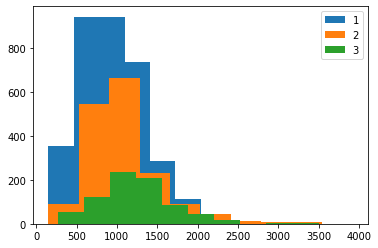

In [49]:
for i in range(1,4):
  plt.hist(df_temp[df_temp.Balcony==i]['Build_up_area(sq.ft)'],label=[f'{i}'])
plt.legend()

In [50]:
def fillmissing(x,y):
  if x == 'Missing' and y > 1200:
    return 2
  elif x == 'Missing' and y <= 1200:
    return 1
  return int(x)

In [51]:
balcony = df.apply(lambda row:fillmissing(row['Balcony'],row['Build_up_area(sq.ft)']),axis=1)
balcony.dtype

dtype('int64')

In [52]:
balcony.unique()

array([1, 4, 3, 2, 5, 6])

In [53]:
df.Balcony = balcony
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                object
Balcony                   int64
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

In [54]:
import gc
del balcony
gc.collect()

150

In [55]:
df.Balcony.quantile(0.97)

3.0

In [56]:
df1 = df[~(df.Balcony>3)]

In [57]:
df1.shape

(15158, 9)

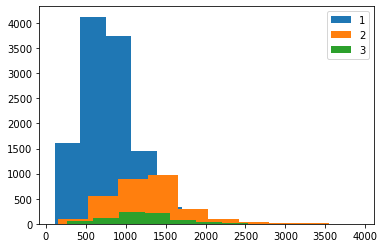

In [58]:
for i in range(1,4):
  plt.hist(df1[df1.Balcony==i]['Build_up_area(sq.ft)'],label=[f'{i}'])
plt.legend()

In [59]:
df1['Build_up_area(sq.ft)'].quantile(0.96)

1750.0

In [60]:
df2 = df1[~(df1['Build_up_area(sq.ft)'] > 2000)]

In [61]:
df2.shape

(14911, 9)

In [62]:
df2.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350,Semi Furnished,1,1,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850,Semi Furnished,3,1,2.0,1400 sq.ft
3,Andheri,1 BHK Apartment,31500,650,Unfurnished,2,1,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250,Unfurnished,2,3,1.0,800 sq.ft
5,Andheri,3 BHK Apartment,65000,1050,Fully Furnished,3,1,2.0,850 sq.ft


In [63]:
df2.Type.unique()

array(['1 RK Apartment', '3 BHK Apartment', '1 BHK Apartment',
       '2 BHK Apartment'], dtype=object)

In [64]:
Types = df2.Type.apply(lambda x:int(x.split()[0]))
Types.unique()

array([1, 3, 2])

In [65]:
df2.Type = Types

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
df2.groupby('Type')['Rent/Month'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
1,6006.0,29126.510656,22185.305675,3500.0,20000.0,26000.0,35000.0,1000000.0
2,6182.0,54744.066160,24542.026385,7000.0,40000.0,47000.0,65000.0,300000.0
3,2723.0,92640.938671,48483.537449,12000.0,60000.0,75000.0,115000.0,500000.0


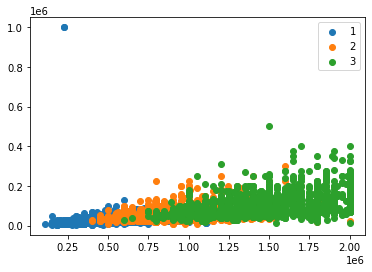

In [67]:
for i in range(1,4):
  plt.scatter(df2[df2.Type==i]['Build_up_area(sq.ft)']*1000,df2[df2.Type==i]['Rent/Month'],label=f'{i}')
plt.legend()

In [72]:
df2[df2['Carpet_area(sq.ft)']=="Missing"].count()

Locality                2085
Type                    2085
Rent/Month              2085
Build_up_area(sq.ft)    2085
Furnishing              2085
Bathrooms               2085
Balcony                 2085
Parking                 2085
Carpet_area(sq.ft)      2085
dtype: int64

In [70]:
def carpet(x):
  try:
     return int(x.split()[0])
  except:
      print(x)
      return 0

In [ ]:
Carpet_area = df2['Carpet_area(sq.ft)'].apply(lambda x: carpet(x))
Carpet_area.dtype

In [74]:
df2['Carpet_area(sq.ft)'] = Carpet_area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


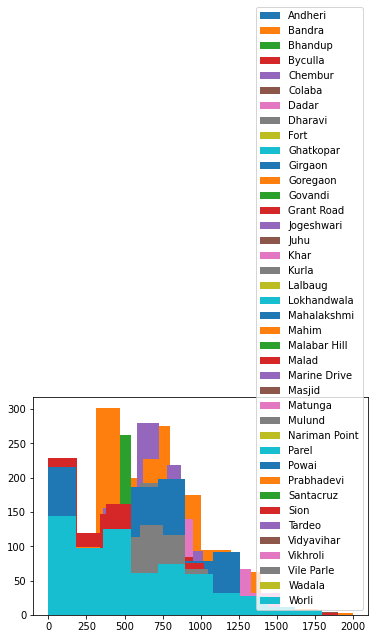

In [75]:
for local in df2.Locality.unique():
  plt.hist(df2[df2.Locality == local]['Carpet_area(sq.ft)'],label = f'{local}')
plt.legend()

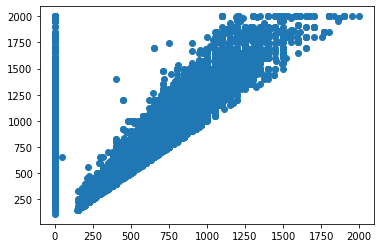

In [76]:
plt.scatter(df2['Carpet_area(sq.ft)'],df2['Build_up_area(sq.ft)'])

In [84]:
from sklearn.linear_model import LinearRegression
x = df2[df2['Carpet_area(sq.ft)']>0]['Build_up_area(sq.ft)']
y = df2[df2['Carpet_area(sq.ft)']>0]['Carpet_area(sq.ft)']
carpet_model = LinearRegression()
carpet_model.fit(x.values.reshape(12826,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
carpet_model.predict(df2[['Build_up_area(sq.ft)']])

array([ 284.34307961, 1370.96882279,  501.66822825, ..., 1117.42281605,
        248.1222215 ,  885.60932417])

In [93]:
def fillcarpet(x,y):
  if(x == 0):
    return carpet_model.predict([[y]])[0]
  return x

In [94]:
carpet = df2.apply(lambda row: fillcarpet(row['Carpet_area(sq.ft)'],row['Build_up_area(sq.ft)']),axis=1)
carpet.dtype

dtype('float64')

In [95]:
df2['Carpet_area(sq.ft)'] = carpet
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1,20000,350,Semi Furnished,1,1,0.0,250.0
1,Andheri,3,100000,1850,Semi Furnished,3,1,2.0,1400.0
3,Andheri,1,31500,650,Unfurnished,2,1,1.0,425.0
4,Andheri,2,44000,1250,Unfurnished,2,3,1.0,800.0
5,Andheri,3,65000,1050,Fully Furnished,3,1,2.0,850.0


In [96]:
df2.dtypes

Locality                 object
Type                      int64
Rent/Month                int64
Build_up_area(sq.ft)      int64
Furnishing               object
Bathrooms                object
Balcony                   int64
Parking                 float64
Carpet_area(sq.ft)      float64
dtype: object

In [97]:
df2.Furnishing.unique()

array(['Semi Furnished', 'Unfurnished', 'Fully Furnished'], dtype=object)

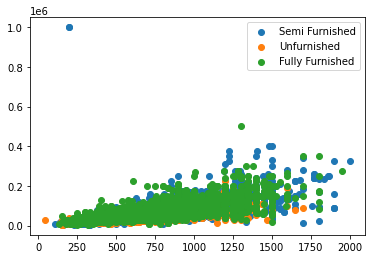

In [98]:
for furn in df2.Furnishing.unique():
  plt.scatter(df2[df2.Furnishing==furn]['Carpet_area(sq.ft)'],df2[df2.Furnishing==furn]['Rent/Month'],label=f'{furn}')
plt.legend()

In [99]:
df2.groupby('Furnishing')['Rent/Month'].describe()

,count,mean,std,min,25%,50%,75%,max
Furnishing,,,,,,,,
Fully Furnished,4079.0,64400.898505,40562.104980,3500.0,37000.0,55000.0,80000.0,500000.0
Semi Furnished,6368.0,53026.884579,40309.546072,3750.0,30000.0,43000.0,65000.0,1000000.0
Unfurnished,4464.0,37019.814068,21550.208199,4000.0,23000.0,33000.0,45000.0,225000.0


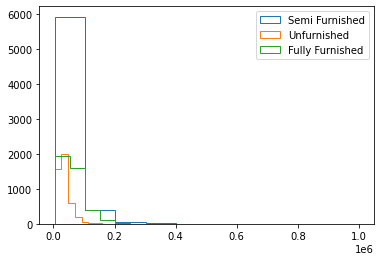

In [126]:
for furn in df2.Furnishing.unique():
  plt.hist(df2[df2.Furnishing==furn]['Rent/Month'],label=f'{furn}',fill=False,stacked=True,histtype='step')
plt.legend()
# ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)

In [130]:
furn = df2.Furnishing.unique()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


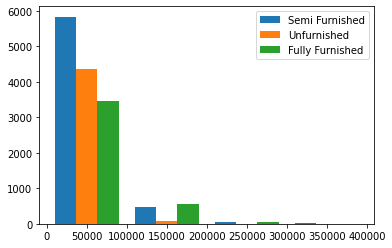

In [120]:
plt.hist([df2[df2.Furnishing==furn[0]]['Rent/Month'],df2[df2.Furnishing==furn[1]]['Rent/Month'],df2[df2.Furnishing==furn[2]]['Rent/Month']]\
          ,bins=[0,100000,200000,300000,400000],label=[f'{furn[0]}',f'{furn[1]}',f'{furn[2]}'])
plt.legend()

In [111]:
df2[df2.Furnishing==furn[0]]['Rent/Month']

Series([], Name: Rent/Month, dtype: int64)

In [137]:
furn[2]

'Fully Furnished'

In [134]:
df2[df2.Furnishing==furn[0]]['Rent/Month'] < 140000.0

0        True
1        True
6        True
7        True
10       True
         ... 
15356    True
15364    True
15367    True
15374    True
15379    True
Name: Rent/Month, Length: 6368, dtype: bool

In [136]:
df2[df2.Furnishing==furn[1]]['Rent/Month'] < 87000.0

87000.0

In [147]:
df2.groupby('Furnishing')['Rent/Month']

In [152]:
import numpy as np
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key ,subdf in df.groupby('Furnishing'):
        mean = np.mean(subdf['Rent/Month'])
        std = np.std(subdf['Rent/Month'])
        reduced_df = subdf[(subdf['Rent/Month']<=(std+mean)) & (subdf['Rent/Month']>=(mean-std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [153]:
df3 = remove_outliers(df2)

In [154]:
df3.shape

(12416, 9)

In [155]:
df3.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,3,65000,1050,Fully Furnished,3,1,2.0,850.000000
1,Andheri,2,75000,750,Fully Furnished,2,1,1.0,650.000000
2,Andheri,2,42000,1000,Fully Furnished,2,1,1.0,755.214235
3,Andheri,3,75000,1200,Fully Furnished,3,1,1.0,900.097667
4,Andheri,2,49500,1000,Fully Furnished,2,1,1.0,800.000000


In [169]:
def bathrooms(x):
  try:
    return int(x)
  except:
    return 0
bathrooms = df3.Bathrooms.apply(lambda x:bathrooms(x))
bathrooms.dtype

dtype('int64')

In [171]:
df3.Bathrooms = bathrooms

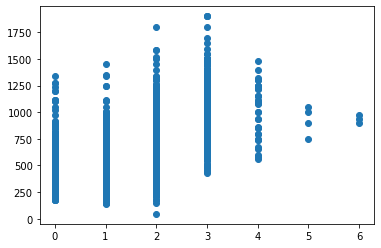

In [172]:
plt.scatter(df3.Bathrooms,df3['Carpet_area(sq.ft)'])

In [174]:
df3.Bathrooms.median()

2.0

In [176]:
df3.Bathrooms = df3.Bathrooms.apply(lambda x:  2 if x==0 else x)

In [177]:
df3.Bathrooms.unique()

array([3, 2, 1, 4, 5, 6])

In [178]:
dummies1 = pd.get_dummies(df3.Locality,drop_first=True)
dummies2 = pd.get_dummies(df3.Furnishing,drop_first=True)

In [179]:
df4 = pd.concat([df3,dummies1,dummies2],axis='columns')
df4.shape

(12416, 50)

In [180]:
df4.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft),Bandra,Bhandup,Byculla,Chembur,Colaba,Dadar,Dharavi,Fort,Ghatkopar,Girgaon,Goregaon,Govandi,Grant Road,Jogeshwari,Juhu,Khar,Kurla,Lalbaug,Lokhandwala,Mahalakshmi,Mahim,Malabar Hill,Malad,Marine Drive,Masjid,Matunga,Mulund,Nariman Point,Parel,Powai,Prabhadevi,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli,Semi Furnished,Unfurnished
0,Andheri,3,65000,1050,Fully Furnished,3,1,2.0,850.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andheri,2,75000,750,Fully Furnished,2,1,1.0,650.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Andheri,2,42000,1000,Fully Furnished,2,1,1.0,755.214235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andheri,3,75000,1200,Fully Furnished,3,1,1.0,900.097667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andheri,2,49500,1000,Fully Furnished,2,1,1.0,800.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
df4.drop(['Locality','Furnishing'],axis=1,inplace=True)

In [182]:
df4.head()

,Type,Rent/Month,Build_up_area(sq.ft),Bathrooms,Balcony,Parking,Carpet_area(sq.ft),Bandra,Bhandup,Byculla,Chembur,Colaba,Dadar,Dharavi,Fort,Ghatkopar,Girgaon,Goregaon,Govandi,Grant Road,Jogeshwari,Juhu,Khar,Kurla,Lalbaug,Lokhandwala,Mahalakshmi,Mahim,Malabar Hill,Malad,Marine Drive,Masjid,Matunga,Mulund,Nariman Point,Parel,Powai,Prabhadevi,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli,Semi Furnished,Unfurnished
0,3,65000,1050,3,1,2.0,850.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,75000,750,2,1,1.0,650.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,42000,1000,2,1,1.0,755.214235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,75000,1200,3,1,1.0,900.097667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,49500,1000,2,1,1.0,800.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
df4.dtypes

Type                      int64
Rent/Month                int64
Build_up_area(sq.ft)      int64
Bathrooms                 int64
Balcony                   int64
Parking                 float64
Carpet_area(sq.ft)      float64
Bandra                    uint8
Bhandup                   uint8
Byculla                   uint8
Chembur                   uint8
Colaba                    uint8
Dadar                     uint8
Dharavi                   uint8
Fort                      uint8
Ghatkopar                 uint8
Girgaon                   uint8
Goregaon                  uint8
Govandi                   uint8
Grant Road                uint8
Jogeshwari                uint8
Juhu                      uint8
Khar                      uint8
Kurla                     uint8
Lalbaug                   uint8
Lokhandwala               uint8
Mahalakshmi               uint8
Mahim                     uint8
Malabar Hill              uint8
Malad                     uint8
Marine Drive              uint8
Masjid  

In [184]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),df4.drop(['Rent/Month'],axis='columns'),df4['Rent/Month'],cv=5)

array([0.62246449, 0.67320084, 0.76875186, 0.68658608, 0.46744556])

In [190]:
from sklearn.linear_model import Lasso
cross_val_score(Lasso(alpha=1),df4.drop(['Rent/Month'],axis='columns'),df4['Rent/Month'],cv=5)

array([0.6213029 , 0.67209516, 0.76780528, 0.6864212 , 0.47077625])

In [191]:
from sklearn.linear_model import Ridge
cross_val_score(Ridge(),df4.drop(['Rent/Month'],axis='columns'),df4['Rent/Month'],cv=5)

array([0.61998781, 0.67183305, 0.76820136, 0.68636391, 0.47097109])

In [193]:
cross_val_score(LinearRegression(),df4.drop(['Rent/Month'],axis='columns'),df4['Rent/Month'],cv=5)

array([0.62246449, 0.67320084, 0.76875186, 0.68658608, 0.46744556])

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4.drop(['Rent/Month'],axis='columns'), df4['Rent/Month'], test_size=0.33, random_state=42)

In [198]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7436659694737101

In [199]:
X_train.columns

Index(['Type', 'Build_up_area(sq.ft)', 'Bathrooms', 'Balcony', 'Parking',
       'Carpet_area(sq.ft)', 'Bandra', 'Bhandup', 'Byculla', 'Chembur',
       'Colaba', 'Dadar', 'Dharavi', 'Fort', 'Ghatkopar', 'Girgaon',
       'Goregaon', 'Govandi', 'Grant Road', 'Jogeshwari', 'Juhu', 'Khar',
       'Kurla', 'Lalbaug', 'Lokhandwala', 'Mahalakshmi', 'Mahim',
       'Malabar Hill', 'Malad', 'Marine Drive', 'Masjid', 'Matunga', 'Mulund',
       'Nariman Point', 'Parel', 'Powai', 'Prabhadevi', 'Santacruz', 'Sion',
       'Tardeo', 'Vidyavihar', 'Vikhroli', 'Vile Parle', 'Wadala', 'Worli',
       'Semi Furnished', 'Unfurnished'],
      dtype='object')

In [211]:
def predict_score(model,bedrooms,Build_up_area,Bathrooms,Balcony,Parking,Carpet_area,locality,furnishing):
    columns= ['Type', 'Build_up_area(sq.ft)', 'Bathrooms', 'Balcony', 'Parking',\
       'Carpet_area(sq.ft)', 'Bandra', 'Bhandup', 'Byculla', 'Chembur',\
       'Colaba', 'Dadar', 'Dharavi', 'Fort', 'Ghatkopar', 'Girgaon',\
       'Goregaon', 'Govandi', 'Grant Road', 'Jogeshwari', 'Juhu', 'Khar',\
       'Kurla', 'Lalbaug', 'Lokhandwala', 'Mahalakshmi', 'Mahim',\
       'Malabar Hill', 'Malad', 'Marine Drive', 'Masjid', 'Matunga', 'Mulund',\
       'Nariman Point', 'Parel', 'Powai', 'Prabhadevi', 'Santacruz', 'Sion',\
       'Tardeo', 'Vidyavihar', 'Vikhroli', 'Vile Parle', 'Wadala', 'Worli',\
       'Semi Furnished', 'Unfurnished']
    columns = np.array(columns)
    # print(np.where(columns==locality))
    try:
      loc_index = np.where(columns==locality)[0][0]
      x[loc_index] = 1
      furn_index = np.where(columns==furnishing)[0][0]
      x[furn_index] = 1
    except:
      pass
    x = np.zeros(len(columns))
    x[0] = bedrooms
    x[1] = Build_up_area
    x[2] = Bathrooms
    x[3] = Balcony
    x[4] = Parking
    x[5] = Carpet_area

    return model.predict([x])[0]

In [212]:
predict_score(model,2,1240,2,4,1,850,'Andheri','Semi Furnished')

57715.31893821875